In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as mpatches
%matplotlib inline

## 【問題1】ダーツのまとを選ぶ
ダーツのまとを選ぶためにサイコロを実装しましょう。


《ヒント》


「サイコロを振る」動作を表現するのにnp.random.choice()を用います。

こうすることで配列の中からランダムに要素を1つ選ぶことができます。

In [149]:
def roll_dice():
    """
    １～６のサイコロの目をランダムに返します
    
    Returns
    -----------
    d: int
        サイコロの目
    
    """
    d = np.random.choice(range(1, 7))
    return d

## 【問題2】ダーツを投げて、刺さった場所を記録する
ダーツの刺さった場所(x座標、y座標)を正規分布から値を発生させることで表現しましょう。

正規分布のx方向の「中心」は問題1で出たサイコロの番号、「標準偏差」は0.1としてください。

刺さった場所（座標）は、配列で保持するようにしてください。


《ヒント》

ダーツが刺さった場所（座標）は、二次元正規分布を真上から見たときのx座標、y座標の交点として表現しましょう。

x座標、y座標の各値は、それぞれが独立した一次元正規分布に従うものとし、

x座標とy座標用に、別々にnp.random.normal()から変数を発生させ、それらの組みを座標点として、配列で保持してください。

また、二次元正規分布はnp.random.multivariate_normal()を用いて表現することもできます。

その場合、例えば平均値ベクトルを[0,0] (mean=[0,0])、共分散行列を[[[0.01,0],[0,0.01]] (cov=[[0.01,0],[0,0.01]])として

np.random.multivariate_normal(mean, cov)とすると、x座標とy座標の変数の組みを作れます。

In [150]:
def plot_throw_darts():
    mu=(roll_dice(),0)
    std=((0.01, 0), (0, 0.01))
    
    x, y = np.random.multivariate_normal(mu, std)
    return x, y

print(plot_throw_darts())

(4.906812073961371, 0.11338112932299545)


## 【問題3】ダーツをたくさん投げて、まとの番号と紐付けた状態で記録する
ダーツを1000回投げて、全てのダーツの刺さった位置をディクショナリに格納してください。

ディクショナリのkeyはダーツのまとの番号になります。

《ヒント》

「ダーツを1000回投げる」というのは 問題1のサイコロを1000回振る　ことに相当します。

問題1と問題2に加えディクショナリに座標を格納する操作をfor文の中に実装することになります。

In [151]:
target = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[]}
t_count = 1000

for _ in range(t_count):
    xy = plot_throw_darts()
    t_no = round(xy[0])
    target[t_no].append(xy) 
    

## 【問題4】ダーツのまとと刺さった位置を描画する
問題3で作成したディクショナリからkeyごとに値を取り出し、まとごとに刺さった場所を描画してみましょう。

ダーツのまとを表現するためここではmatplotlibのpatchesクラスを用いてください。

matplotlibのpatchesクラスの公式ドキュメント

<a href="https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.patches.Circle.html#matplotlib.patches.Circle">matplotlib.patches.Circle — Matplotlib 3.1.1 documentation</a>

<a href="https://matplotlib.org/gallery/shapes_and_collections/donut.html">Mmh Donuts!!! — Matplotlib 3.1.1 documentation</a>

ここまで出来ていれば、最初に示したような図が描画されるはずです。

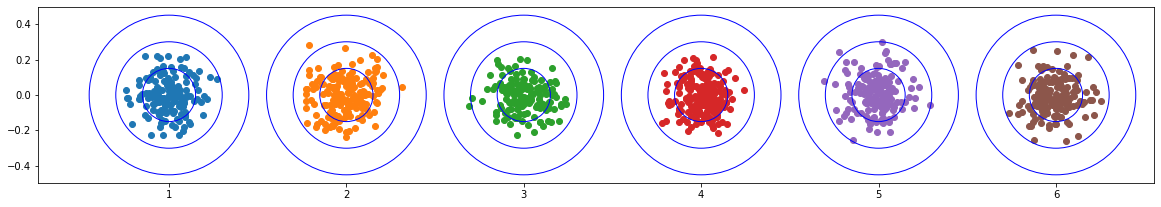

In [158]:

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()

for t_no, xy in target.items():
    xy = np.array(xy)

    #ダーツの刺さった位置を描画
    ax.scatter(xy[:, 0], xy[:, 1])

    #的を作成
    inside_circle = mpatches.Circle((t_no,0),0.15, fc="none", ec="blue", alpha=1)
    midside_circle = mpatches.Circle((t_no,0),0.3, fc="none", ec="blue", alpha=1)
    outside_circle = mpatches.Circle((t_no,0),0.45, fc="none", ec="blue", alpha=1)
    ax.add_patch(inside_circle)
    ax.add_patch(midside_circle)
    ax.add_patch(outside_circle)

ax.set_aspect("equal")


## 【問題5】関数化
ダーツを投げる回数、ダーツのまとの数が変わっても描画できるように、問題1~問題4で作成したコードを関数化しましょう。

《ヒント》

ダーツの投げる回数とダーツのまとの数を関数の引数にしましょう。

In [218]:
def play_darts(num_of_target, throw_count):
    """
    n個の的にm回ダーツを投げたときの結果を描画します
    
    Parameters
    ----------------
    num_of_target: int
        ダーツの的の数
    
    throw_count: int
        ダーツを投げる回数
            
    """
    # ダーツの刺さる位置のばらつき具合を設定
    v = 0.1
    
    #ダーツの的を作成
    targets = {i:[] for i in range(1, num_of_target + 1)}
    
    #ダーツをランダムに投げる
    for _ in range(throw_count):
        t_no = np.random.choice(range(1, num_of_target + 1))
        x = np.random.normal(t_no, v)
        y = np.random.normal(0, v)
        targets[t_no].append([x, y])
    
    #グラフの準備
    fig = plt.figure(figsize=(20, 10))
    ax  = fig.add_subplot()
    
    #ダーツの結果を描画
    for t_no, xy in targets.items():
        xy = np.array(xy)
        #ダーツの刺さった位置を描画
        if len(xy) > 0:
            ax.scatter(xy[:, 0], xy[:, 1])

        #的を作成
        inside_circle = mpatches.Circle((t_no,0),0.15, fc="none", ec="blue", alpha=1)
        midside_circle = mpatches.Circle((t_no,0),0.3, fc="none", ec="blue", alpha=1)
        outside_circle = mpatches.Circle((t_no,0),0.45, fc="none", ec="blue", alpha=1)
        ax.add_patch(inside_circle)
        ax.add_patch(midside_circle)
        ax.add_patch(outside_circle)        

    ax.set_aspect("equal")
    plt.show()
    

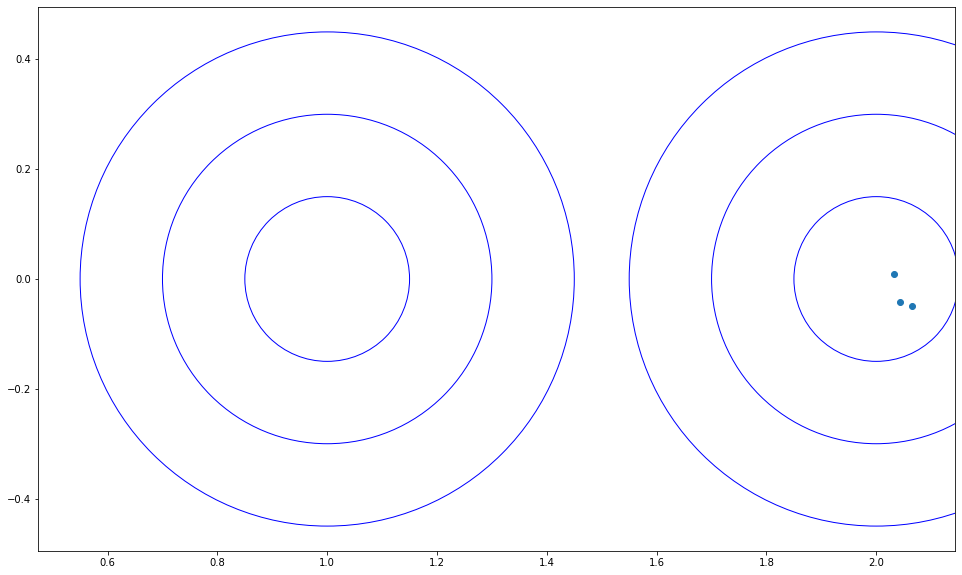

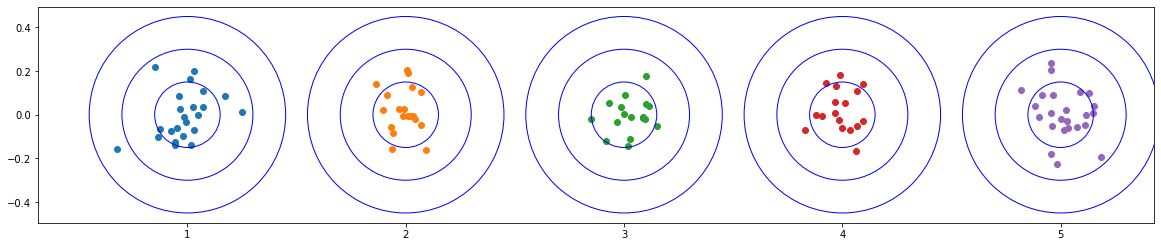

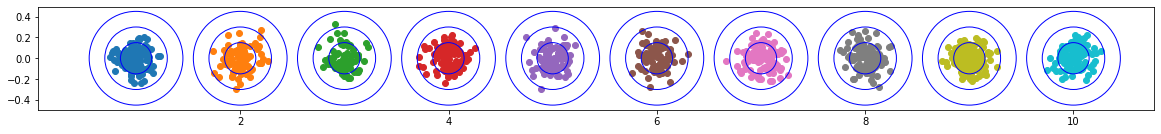

In [219]:
play_darts(2,3)
play_darts(5,100)
play_darts(10,1000)

## 確認
・場合によっては的の右端が切れるのでfigのサイズを自動調整できないか